In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

First we load up the data. This data corresponds to the 2-4 + 4-2 degenerate eigenmode.

In [4]:
data_filename = 'data/15_710_718_0.2.npy'
amplitude = np.load(data_filename)
summed_z = np.average(amplitude, 2)
print(data_filename)

data/15_710_718_0.2.npy


Here is the data without antialiasing:

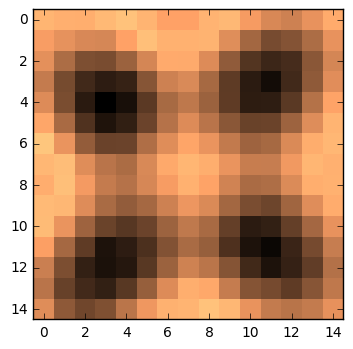

In [5]:
plt.imshow(summed_z, cmap='copper_r', interpolation='none')
plt.show()

Here is the data with antialising:

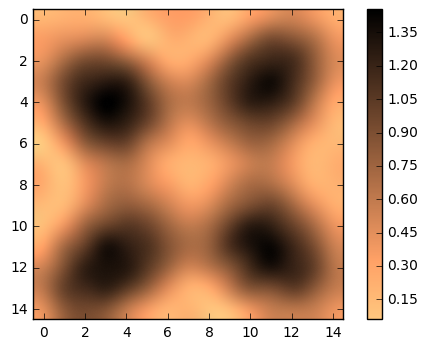

In [6]:
plt.imshow(summed_z, cmap='copper_r', interpolation='lanczos')
plt.colorbar()

We will always display our plots in this report in the antialiased form, as it is clearer. However, all analysis and calculations is done with the raw maps. 

Now, we generate a theoretical plot:

$f2(x)*f4(y)$ is 2-4. 

We have $f2(x) = 0.667*(\sin(2 x) + 0.5*\sin(4 x))$ and $f4(x) = 0.6*(\sin(4x) + 0.667\sin(6x))$

Here are the associated functions:

In [7]:
f2 = lambda x: 0.667*(np.sin(2*x) + 0.5*np.sin(4*x))
f4 = lambda x: 0.6*(np.sin(4*x) + 0.667*np.sin(6*x))

Here is the range we are working over. Note that this range is approximate due to how well we know the sides of our plate:

In [17]:
steps_to_edge = 7950. #\pm 50
steps_taken_max = 4000. #(some data has 5000)
phase_at_edge = 1.0
phase_at_max = phase_at_edge*steps_taken_max/steps_to_edge
grid_size = 15
x_domain = np.linspace(-phase_at_edge, phase_at_edge, grid_size)
y_domain = np.copy(x_domain)

Now, we calculate the theoretical relative amplitude at each of these grid points:

In [18]:
four_two_theory_amplitude = np.dot(f4(x_domain)[:, None],f2(y_domain)[None])
two_four_theory_amplitude = np.dot(f2(x_domain)[:, None],f4(y_domain)[None])

Finally, here is the colormap of the 1-5+5-1 degenerate eigenmode, over our mapped region:

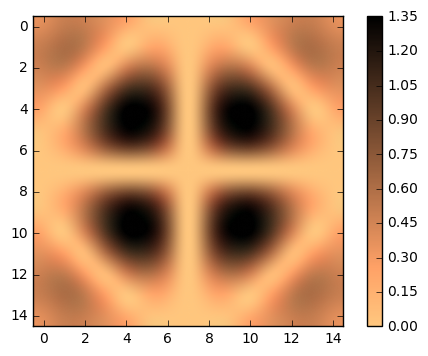

In [19]:
theoretical_mode = np.abs(four_two_theory_amplitude+two_four_theory_amplitude)
plt.imshow(theoretical_mode,
           cmap='copper_r', interpolation='lanczos')
plt.colorbar()

Here we find the indices of highest intensity - the ones that matter the most for our fit. We only pick the top percentile.

In [53]:
percentile = 0
high_indices = np.argwhere(theoretical_mode>=np.percentile(theoretical_mode, percentile))
left_indices = high_indices[:, 0]
right_indices = high_indices[:, 1]

In [54]:
fit = minimize(lambda a: np.sum(
        np.square((a*theoretical_mode[left_indices, right_indices] - \
                   summed_z[left_indices, right_indices])/\
                      0.1)
        ),
        x0=[1], method='Nelder-Mead')
a = fit.x[0]
fit

 final_simplex: (array([[ 1.63994141],
       [ 1.64003906]]), array([ 9827.02554773,  9827.02556627]))
           fun: 9827.0255477349274
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 15
        status: 0
       success: True
             x: array([ 1.63994141])

# Here we calculate and plot the residuals of this fit:

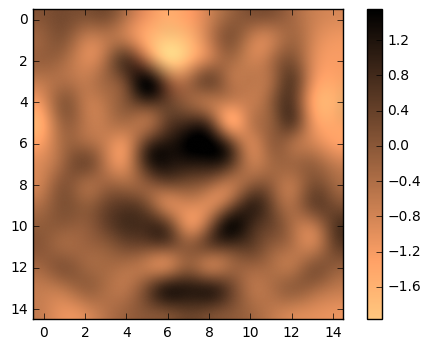

In [55]:
residuals = a*theoretical_mode-summed_z
plt.imshow(residuals, cmap='copper_r', interpolation='lanczos')
plt.colorbar()

In [56]:
reduced_chi_square = np.sum(np.square(residuals[left_indices, right_indices]/\
                                      0.1))/(left_indices.size-1)
reduced_chi_square

43.870649766673786